In [1]:
import os
import numpy as np
import efficientnet.tfkeras
from tensorflow.keras.models import load_model
os.environ["CUDA_VISIBLE_DEVICES"]=" "

# load model

In [2]:
model_dir ='/media/tohn/SSD/ModelTrainByImages/R2_7/models/MultiTask_EffNetB5_15AB_5FP_fold7_1.h5'
model = load_model(model_dir)
height = width = model.input_shape[1]

# Select Data

In [3]:
import pandas as pd
df0 = pd.read_csv (r'/home/yupaporn/codes/USAI/Validationdf_fold7.csv')
print(df0 .shape)
dataframe = df0[(df0['Path Crop']!='None' )&(df0['Path Crop']!='Nan')]
# a = df01[df01['Case'].between(1, 10)]
# dataframe = df01[df01['Abs Position']!='P8']
print(dataframe.shape)
print('Normal: ',dataframe[dataframe['Class']=='Normal'].shape)
print('Abnormal: ',dataframe[dataframe['Class']=='Abnormal'].shape)
dataframe.head(5)

(657, 25)
(657, 25)
Normal:  (429, 25)
Abnormal:  (228, 25)


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Case,Abs Position,Sub Position,Class,Sub_class,Path Full,...,left,top,width,height,Rleft,Rtop,Rwidth,Rheight,FileName,filename
0,0,0,411,411,49,P5,P52,Abnormal,AB01,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,...,200.0,119.0,561.0,667.0,0.202166,0.132937,0.564982,0.743028,AB01 P5-2 C049.JPG,AB01 P5-2 C049.JPG
1,1,1,412,412,49,P2,P2,Abnormal,AB02,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,...,191.0,125.0,453.0,472.0,0.189902,0.139520,0.450450,0.525253,AB02 P2 C049.JPG,AB02 P2 C049.JPG
2,2,2,413,413,49,P5,P51,Abnormal,AB02,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,...,162.0,163.0,546.0,638.0,0.157665,0.181944,0.530864,0.709091,AB02 P5-1 C049.JPG,AB02 P5-1 C049.JPG
3,3,3,414,414,49,P1,P1,Abnormal,AB02,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,...,271.0,118.0,530.0,603.0,0.275638,0.131439,0.538745,0.670707,AB02 P1 C049.JPG,AB02 P1 C049.JPG
4,4,4,415,415,49,P3,P31,Abnormal,AB02,/media/tohn/HDD/VISION_dataset/USAI/ABnormal01...,...,149.0,152.0,577.0,718.0,0.164463,0.169823,0.634730,0.797980,AB02 P3-1 C049.JPG,AB02 P3-1 C049.JPG


In [4]:
labels ={0: 'AB01', 1: 'AB02', 2: 'AB03', 3: 'AB04', 4: 'AB05', 5: 'AB06', 6: 'AB07', 7: 'AB081', 8: 'AB082', 9: 'AB083', 10: 'AB09', 11: 'AB10', 12: 'AB11', 13: 'AB12', 14: 'Normal'}
print(labels)

{0: 'AB01', 1: 'AB02', 2: 'AB03', 3: 'AB04', 4: 'AB05', 5: 'AB06', 6: 'AB07', 7: 'AB081', 8: 'AB082', 9: 'AB083', 10: 'AB09', 11: 'AB10', 12: 'AB11', 13: 'AB12', 14: 'Normal'}


# Prediction

In [5]:
from tensorflow.keras.preprocessing import image
def predict_image(img_path):
    # Read the image and resize it
    img = image.load_img(img_path, target_size=(height, width))
    # Convert it to a Numpy array with target shape.
    x = image.img_to_array(img)
    # Reshape
    x = x.reshape((1,) + x.shape)
    x /= 255.
    result = model.predict([x])
    
    return result[0][0]

#Predict
pred_list = list()
prob_list = list()
img_path=dataframe['Path Crop'].tolist()
for i in range(0,len(img_path)):
    predict = predict_image(img_path[i])
    result = np.argmax(predict)
    pred_list.append(labels[result])
    prob_list.append(predict[result])
    
dataframe['category'] = pred_list
dataframe['Prob'] = prob_list

# Performance

In [6]:
data_train = dataframe
#เช็คคลาสใน Predicted
pred_class = set(data_train['category'])
print('Predicted : ',len(pred_class))
print(pred_class)
#เช็คคลาสใน Actual
classe = set(data_train['Sub_class'])
print('Actual : ',len(classe))
print(classe)

Predicted :  10
{'Normal', 'AB01', 'AB082', 'AB12', 'AB06', 'AB03', 'AB05', 'AB11', 'AB02', 'AB04'}
Actual :  15
{'Normal', 'AB01', 'AB082', 'AB081', 'AB06', 'AB10', 'AB03', 'AB05', 'AB12', 'AB11', 'AB083', 'AB07', 'AB09', 'AB02', 'AB04'}


In [7]:
import numpy as np
from sklearn.metrics import confusion_matrix
act = data_train['Sub_class'].map({'Normal':0,'AB01':1,'AB02':1,'AB03':1,'AB04':1,'AB05':1,'AB06':1,'AB07':1,'AB081':1,'AB082':1,'AB083':1,'AB09':1,'AB10':1,'AB11':1,'AB12':1}).values
pred = data_train['category'].map({'Normal':0,'AB01':1,'AB02':1,'AB03':1,'AB04':1,'AB05':1,'AB06':1,'AB07':1,'AB081':1,'AB082':1,'AB083':1,'AB09':1,'AB10':1,'AB11':1,'AB12':1}).values

cmat = confusion_matrix(act, pred)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act, pred))#performance

classifier accuracy = 81.12633181126331%
              precision    recall  f1-score   support

           0       0.79      0.96      0.87       429
           1       0.88      0.53      0.66       228

    accuracy                           0.81       657
   macro avg       0.84      0.74      0.76       657
weighted avg       0.82      0.81      0.80       657



413 16 108 120


Text(0.5, 21.5, 'Predicted label')

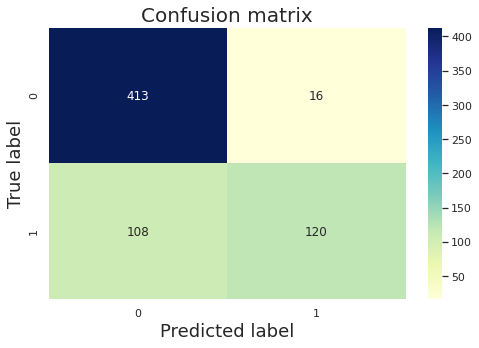

In [8]:
#create CF 
data = {'Actual': act,'Predicted' : pred,}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act, pred)
TN, FP, FN, TP = confusion_matrix(act, pred).ravel()
print(TN, FP, FN, TP)
#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

In [9]:
import numpy as np
from sklearn.metrics import confusion_matrix
act = data_train['Sub_class'].array
pred = data_train['category'].array

cmat = confusion_matrix(act, pred)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act, pred))#performance

classifier accuracy = 73.97260273972603%
              precision    recall  f1-score   support

        AB01       0.50      0.79      0.61        33
        AB02       0.51      0.56      0.54        32
        AB03       0.00      0.00      0.00         9
        AB04       0.80      0.14      0.24        29
        AB05       0.33      0.08      0.13        12
        AB06       1.00      0.14      0.25         7
        AB07       0.00      0.00      0.00        10
       AB081       0.00      0.00      0.00        15
       AB082       0.67      0.13      0.22        15
       AB083       0.00      0.00      0.00         5
        AB09       0.00      0.00      0.00        11
        AB10       0.00      0.00      0.00         5
        AB11       0.00      0.00      0.00        13
        AB12       0.62      0.66      0.64        32
      Normal       0.79      0.96      0.87       429

    accuracy                           0.74       657
   macro avg       0.35      0.23      

/home/yupaporn/miniconda3/envs/USAI3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yupaporn/miniconda3/envs/USAI3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/yupaporn/miniconda3/envs/USAI3/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

Text(0.5, 21.5, 'Predicted label')

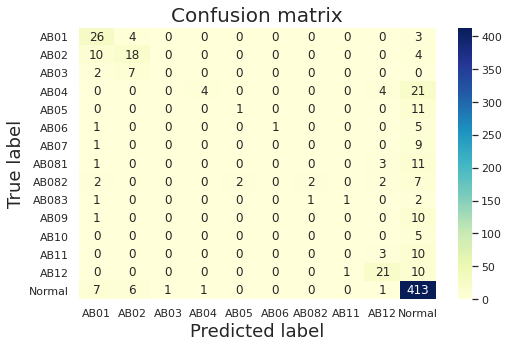

In [10]:
#create CF 
data = {'Actual': act,'Predicted' : pred,}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act, pred)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)